<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Machine Learning in Finance LAB

## due 2023-01-29 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

# Importing Package

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# Classification: Iris

In [347]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [348]:
X, y = X_iris[:, :2], y_iris

In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33) 
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [343]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

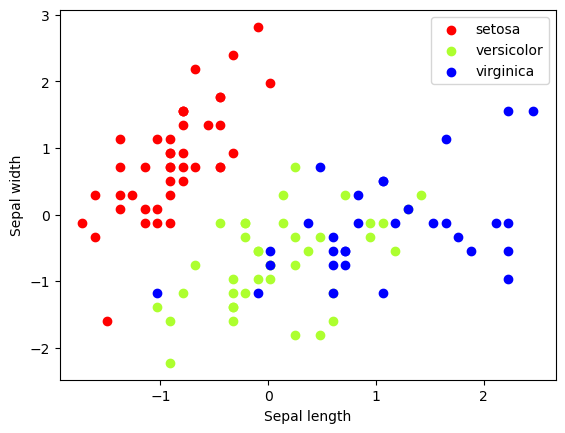

In [171]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c =colors[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [8]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [9]:
print(clf.coef_)
print(clf.intercept_)

[[-25.68822452  11.49559386]
 [ -0.26152082  -4.32167831]
 [  5.72344877   3.65112163]]
[-18.15624742   3.09647045  -2.75692331]


In [10]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

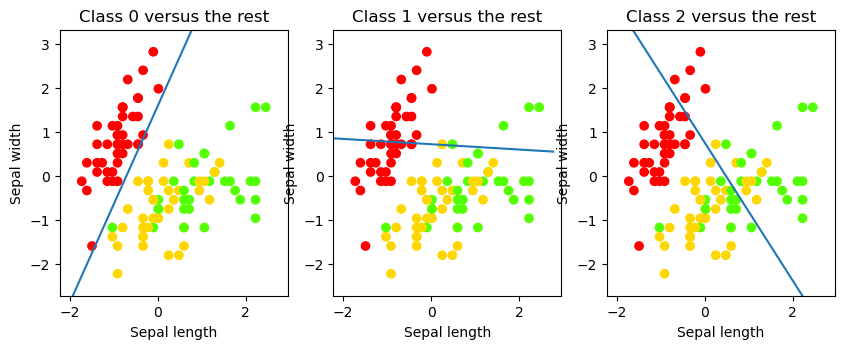

In [11]:
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [12]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

[0]
[[15.16934361  3.06072822 -9.65714102]]


In [14]:
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
print( metrics.confusion_matrix(y_test, y_pred) )

0.8035714285714286
0.6052631578947368
              precision    recall  f1-score   support

      setosa       1.00      0.88      0.93         8
  versicolor       0.42      0.73      0.53        11
   virginica       0.67      0.42      0.52        19

    accuracy                           0.61        38
   macro avg       0.70      0.67      0.66        38
weighted avg       0.67      0.61      0.61        38

[[ 7  0  1]
 [ 0  8  3]
 [ 0 11  8]]


# Classification: Tresasury

In [350]:
T = pd.read_csv('Treasury Squeeze raw score data.csv')
T = T.drop(['rowindex', 'contract'], axis=1)

In [351]:
l = list(T.columns)
X_l = l[:-1]
y_l = list(l[-1:])

X = T[X_l]
y = T[y_l]

for i in range(len(y)):
    if y['squeeze'][i] == True: 
        y['squeeze'][i] = 1
    else: 
        y['squeeze'][i] = 0
X = np.array(X)       
y = np.array(y['squeeze'])

/var/folders/9z/csd85yv12f10212nnmpxfd0h0000gn/T/ipykernel_20534/4203951657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['squeeze'][i] = 1
/var/folders/9z/csd85yv12f10212nnmpxfd0h0000gn/T/ipykernel_20534/4203951657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['squeeze'][i] = 0


In [353]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33) 
print(X_train.shape, y_train.shape)

(675, 9) (675,)


In [355]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [362]:
y_train=y_train.astype('int')
clf = SGDClassifier()
clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[ 0.43223878  1.1026829  -0.53984998 -0.0856848   0.60355118 -0.02713109
   1.3742536   0.17439454  1.80487549]]
[-1.33012375]


In [364]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

In [368]:
y_test=y_test.astype('int')

y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

print( metrics.classification_report(y_test, y_pred) )
print( metrics.confusion_matrix(y_test, y_pred) )

0.6148148148148148
0.6977777777777778
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       136
           1       0.67      0.46      0.55        89

    accuracy                           0.70       225
   macro avg       0.69      0.66      0.66       225
weighted avg       0.69      0.70      0.68       225

[[116  20]
 [ 48  41]]


# Signing

In [15]:
print("My name is Yu-Ching Liao")
print("My NetID is: 656724372")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yu-Ching Liao
My NetID is: 656724372
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
